In [2]:
import numpy as np
import statistics #Pacote básico de estatisticas do Python
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # organiza as datas no df de forma automática
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("IPCA - %a.m..xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df2 = pd.read_excel("IPCA - 12 meses (%a.m.).xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])
df3 = pd.read_excel("PIB Ac. 12 meses - R$ mi.xlsx", engine="openpyxl",index_col=0, parse_dates=["Data"])

In [4]:
df = df.merge(df2, on = "Data") \
    .merge(df3, on = "Data")

In [5]:
df = df[192:]
df

,IPCA - %a.m.,Acumulado,Numero indice,Selic,SelicR,Serie tratada,IPCA - 12 meses (%a.m.),PIB Ac. 12 meses - R$ mi,PibR,NFSP,NFSP Acumulada
Data,,,,,,,,,,,
2019-01-01,0.32,5.520172,83.609580,6.40,2.5280,7.9760,3.78,7030840.8,8439061.7,-46897.38,108300.96
2019-02-01,0.43,5.543909,83.969101,6.40,2.4157,7.8637,3.89,7068072.1,8447426.2,14930.79,105818.21
2019-03-01,0.75,5.585488,84.598869,6.40,1.7448,7.1928,4.58,7081874.8,8400915.7,18629.24,99312.17
2019-04-01,0.57,5.617325,85.081083,6.40,1.3907,6.8387,4.94,7108793.0,8385052.8,-6637.08,95575.00
2019-05-01,0.13,5.624628,85.191688,6.40,1.6641,7.1121,4.66,7163407.0,8438501.7,13007.99,100358.94
2019-06-01,0.01,5.625190,85.200207,6.40,2.9348,8.3828,3.37,7176976.1,8453640.8,12706.22,99573.96
2019-07-01,0.19,5.635878,85.362088,6.40,3.0786,8.5266,3.22,7217242.6,8484948.6,2762.98,98936.29
2019-08-01,0.11,5.642078,85.455986,5.90,2.3893,7.8373,3.43,7247570.4,8511241.1,13447.65,95508.39
2019-09-01,-0.04,5.639821,85.421804,5.71,2.7372,8.1852,2.89,7289734.2,8564182.2,20540.69,91427.90


In [6]:
data = pd.date_range("2003-01-01", periods = 96, freq = "MS")
ipca = df["IPCA - %a.m."]
ipca12 = df["IPCA - 12 meses (%a.m.)"]
pib = df["PIB Ac. 12 meses - R$ mi"]
selic = df["Selic"]
selicr = df["SelicR"]
nec = df["NFSP"]
necac = df["NFSP Acumulada"]

serie = df["Serie tratada"] # dados da selic real, eliminando os negativos usando xn - xnmin + 1

In [7]:
#Função para definir a distribuição de frequência, prequel para o histograma
def ac(x) :
    at = max(x) - min(x)
    ki = round(np.sqrt(pd.Series.count(x)))
    h = round(at/ki,2)

    return "Amplitude total = " + str(at),"N. de classes = " + str(ki), "Amplitude de classes = " + str(h)

In [8]:
#Função da estatistica descritica
from scipy import stats

def stat_desc(x) :
    minx = "Mínimo: " + str(x.min())
    maxx = "Máximo: " + str(x.max())
    count = "Observações: " + str(len(x))
    median = "Mediana: " + str(statistics.median(x))
    var = "Variancia: " + str(statistics.variance(x))
    coefvar = "Coeficiente de Variação: " + str(stats.variation(x))
    ermed = "Erro Padrão da Média: " + str(stats.mstats.sem(x))
    mean = "Media: " + str(statistics.mean(x))
    desv = "Desvio Padrão: " + str(np.std(x))
    mad = "Desvio absoluto médio: " + str(pd.Series.mad(x))

    return print(count + "\n"
                 + minx + "\n"
                 + maxx + "\n"
                 + mean + "\n"
                 + median + "\n"
                 + var + "\n"
                 + coefvar + "\n"
                 + desv + "\n"
                 + mad + "\n"
                 + ermed + "\n")

In [9]:
# Teste de normalidade dos dados, QQ-Plot, Curtose e Shapiro-Wilk

def norm_test(x) :
    curtose = stats.kurtosis(x)
    base = 3
    if curtose == base :
        print("Curtose = %.3f," % curtose + " Distribuição Mesocurtica – A distribuiçao de frequências e a propria distribuição normal")
    elif curtose > 3 :
        print("Curtose = %.3f," % curtose + " Distribuição Leptocurtica – A distribuiçao é concentrada em torno da média (alta homogeneidade)")
    else:
        print("Curtose = %.3f," % curtose + " Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)")

    print("\n")

    assim = stats.skew(x)
    base1 = 0
    if assim == base1 :
        print("Perfeitamente simetrica = %.3f," % assim)
    elif assim > base1 :
        print("Assimetria negativa = %.3f," % assim + "Concentração a esquerda da média")
    else:
        print("Assimetria positiva = %.3f," % curtose + " Concentração a direita da média")

    # Teste de JARQUE-BERA, usando função de resposta para o resultado do teste.

    print("\n"+"Teste de Jarque-Bera")
    stat, p = stats.jarque_bera(x)
    print('Estatistica = %.3f, p-valor = %.10f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

    # Teste de Shapiro-Wilk, usando a função de resposta para o resultado do teste.
    print("\n"+"Teste de Shapiro")

    stat1,p1 = stats.shapiro(x)

    print('Estatistica = %.3f, p-valor = %.10f' % (stat1, p1))
    alpha = 0.05
    if p1 > alpha:
        print("A amostra apresenta distribuição normal (Falha em rejeitar H0)")
    else:
        print("A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)")

    #Refatorar o gráfico
    #sm.qqplot(x, line='45')

    return norm_test

In [10]:
#taxas de crescimento, PIB real e nominal

def txcresc (x):
    n=len(x)
    t=np.arange(1,n+1,1)
    y = np.array(x)
    ylog = np.log(y)
    curve = np.polyfit(t, ylog, 1)
    txp = ((x[-1]/x[0])-1)*100 #Taxa de crescimento nominal do período completo
    txma = ((x[-1]-x[0])/(x[0]*n))*100
    txmg = (((x[-1]/x[0])**(1/n))-1)*100
    txlog = round((curve[0] * 100),5)

    #Previsão com matemática financeira:
    vfxa = x[-1]*(1+(txma/100)) # aritmética
    vfxg = x[-1]*(1+(txmg/100)) #geométrica
    vfxlog = x[-1]*(1+(txlog/100))

    return print("Taxa de crescimento nominal = %.4f" % txp + "\n"
                 + "Taxa de crescimento média aritmética = %.4f" % txma
                 + "\n" + "Taxa de crescimento média geométrica = %.4f" % txmg
                 + "\n" + "Taxa de crescimento média log = %.4f" % txlog + "\n"
                 + "Previsão Aritmética = %.2f" % vfxa + "\n"
                 + "Previsão Geométrica = %.2f" % vfxg + "\n"
                 + "Previsão Log = %.2f" % vfxlog)

('Amplitude total = 1.73', 'N. de classes = 6', 'Amplitude de classes = 0.29')


Text(0.5, 1.0, 'Histograma e frequencia do IPCA')

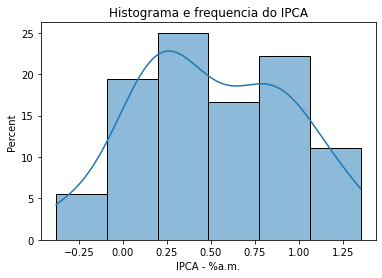

In [11]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_ipca = ac(ipca)
k = round(np.sqrt(pd.Series.count(ipca))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_ipca)

sns.histplot(x=ipca,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do IPCA")

('Amplitude total = 7.5234', 'N. de classes = 6', 'Amplitude de classes = 1.25')


Text(0.5, 1.0, 'Histograma e frequencia da Selic Real')

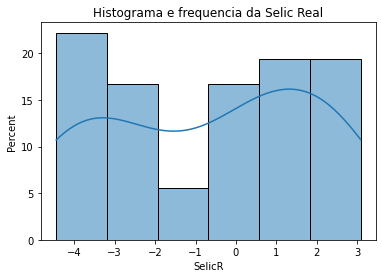

In [12]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_selic = ac(selicr)
k = round(np.sqrt(pd.Series.count(selicr))) #selecionar a variável de interesse antes de rodar o gráfico
print(freq_selic)

sns.histplot(x=selicr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia da Selic Real")

('Amplitude total = 1643622.2999999998', 'N. de classes = 6', 'Amplitude de classes = 273937.05') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Nominal')

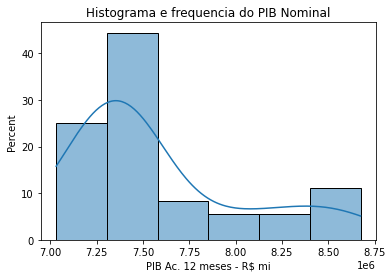

In [13]:
#Disposição dos histogramas com as distribuições, desconsiderando o ipca acumulado por ser uma variável acumulada
freq_pib = ac(pib)
print(freq_pib, "\n")

k = round(np.sqrt(pd.Series.count(pib)))
sns.histplot(x=pib,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Nominal")

('Amplitude total = 463622.19999999925', 'N. de classes = 6', 'Amplitude de classes = 77270.37') 



Text(0.5, 1.0, 'Histograma e frequencia do PIB Real')

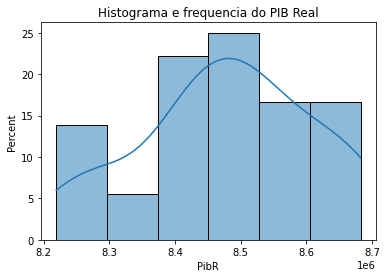

In [14]:
#Disposição do histogramas com as distribuições
pibr = df["PibR"]

freq_pibr= ac(pibr) # reiterando o função de frequencia utilizada anteriormente
print(freq_pibr, "\n")

k = round(np.sqrt(pd.Series.count(pibr)))
sns.histplot(x=pibr,
             kde=True,
             legend=True,
             bins=k,
             stat="percent").set_title("Histograma e frequencia do PIB Real")

Text(0.5, 1.0, 'IPCA Acumulada - (%a.a.)')

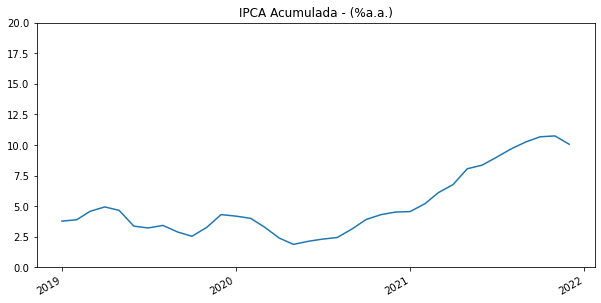

In [36]:
fig, ax = plt.subplots(1,1)

ax.plot(ipca12, linewidth = 1.5)
ax.set(ylim=(0.0, 20))
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
fig.autofmt_xdate()
ax.set_title('IPCA Acumulada - (%a.a.)')

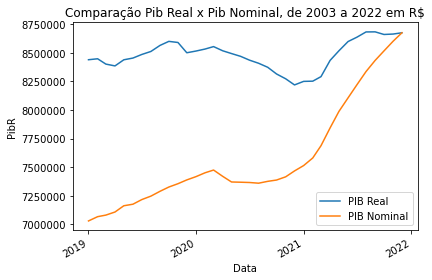

In [16]:
from textwrap import wrap
fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=df, x="Data", y="PibR",dashes=False, label = "PIB Real")
sns.lineplot(data=df, x="Data", y="PIB Ac. 12 meses - R$ mi", label = "PIB Nominal")
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Pib Real x Pib Nominal, de 2003 a 2022 em R$", 60)))
fig.tight_layout()

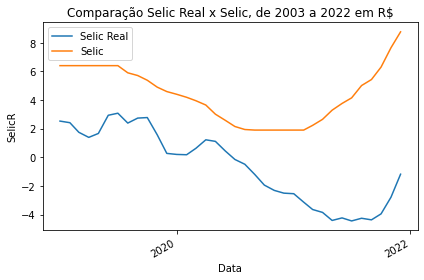

In [17]:
from textwrap import wrap
fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=df, x="Data", y="SelicR",dashes=False, label = "Selic Real")
sns.lineplot(data=df, x="Data", y="Selic", label = "Selic")
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
fig.autofmt_xdate()
ax.set_title("\n".join(wrap("Comparação Selic Real x Selic, de 2003 a 2022 em R$", 60)))
fig.tight_layout()

In [18]:
stat_desc(pib)

Observações: 36
Mínimo: 7030840.8
Máximo: 8674463.1
Media: 7578855.425
Mediana: 7402676.35
Variancia: 216524899931.49908
Coeficiente de Variação: 0.06053869746757274
Desvio Padrão: 458814.03572454746
Desvio absoluto médio: 367743.20138888917
Erro Padrão da Média: 77553.72688435258



In [19]:
stat_desc(pibr)

Observações: 36
Mínimo: 8218937.4
Máximo: 8682559.6
Media: 8479327.758333333
Mediana: 8488936.45
Variancia: 16892539972.572191
Coeficiente de Variação: 0.015113631417795413
Desvio Padrão: 128153.43441013142
Desvio absoluto médio: 103678.62731481473
Erro Padrão da Média: 21661.884069958887



In [20]:
stat_desc(ipca12)

Observações: 36
Mínimo: 1.88
Máximo: 10.74
Media: 5.079166666666667
Mediana: 4.25
Variancia: 7.275585
Coeficiente de Variação: 0.5236296949423934
Desvio Padrão: 2.65960249222824
Desvio absoluto médio: 2.166064814814815
Erro Padrão da Média: 0.4495548724386527



In [21]:
stat_desc(selic)

Observações: 36
Mínimo: 1.9
Máximo: 8.76
Media: 4.382777777777778
Mediana: 4.295
Variancia: 3.770294920634921
Coeficiente de Variação: 0.43683857559862066
Desvio Padrão: 1.9145664016097328
Desvio absoluto médio: 1.663333333333333
Erro Padrão da Média: 0.32362078805614625



In [22]:
stat_desc(selicr)

Observações: 36
Mínimo: -4.4448
Máximo: 3.0786
Media: -0.614525
Mediana: 0.012999999999999998
Variancia: 6.625962544785714
Coeficiente de Variação: -4.130167877230297
Desvio Padrão: 2.538091414754949
Desvio absoluto médio: 2.2739833333333337
Erro Padrão da Média: 0.429015751614013



In [23]:
stat_desc(necac)

Observações: 36
Mínimo: -64727.49000000001
Máximo: 702950.23
Media: 270685.69444444444
Mediana: 107059.58499999999
Variancia: 66488081464.634476
Coeficiente de Variação: 0.9392676576838062
Desvio Padrão: 254246.3181893478
Desvio absoluto médio: 228859.56598765432
Erro Padrão da Média: 42975.4715133575



In [24]:
norm_test(pib)

Curtose = 0.024, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 1.118,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 7.499, p-valor = 0.0235333238
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)

Teste de Shapiro
Estatistica = 0.834, p-valor = 0.0000831910
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [25]:
norm_test(pibr)

Curtose = -0.689, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria positiva = -0.689, Concentração a direita da média

Teste de Jarque-Bera
Estatistica = 1.071, p-valor = 0.5853302315
A amostra apresenta distribuição normal (Falha em rejeitar H0)

Teste de Shapiro
Estatistica = 0.962, p-valor = 0.2471368164
A amostra apresenta distribuição normal (Falha em rejeitar H0)


<function __main__.norm_test(x)>

In [26]:
norm_test(ipca12)

Curtose = -0.394, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 0.967,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 5.842, p-valor = 0.0538872264
A amostra apresenta distribuição normal (Falha em rejeitar H0)

Teste de Shapiro
Estatistica = 0.848, p-valor = 0.0001748806
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [27]:
norm_test(selic)

Curtose = -1.023, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria negativa = 0.192,Concentração a esquerda da média

Teste de Jarque-Bera
Estatistica = 1.790, p-valor = 0.4085294322
A amostra apresenta distribuição normal (Falha em rejeitar H0)

Teste de Shapiro
Estatistica = 0.920, p-valor = 0.0122048715
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

In [28]:
norm_test(selicr)

Curtose = -1.409, Distribuição Platicurtica – A distribuiçao é achatada (alta variabilidade)


Assimetria positiva = -1.409, Concentração a direita da média

Teste de Jarque-Bera
Estatistica = 3.116, p-valor = 0.2105729997
A amostra apresenta distribuição normal (Falha em rejeitar H0)

Teste de Shapiro
Estatistica = 0.912, p-valor = 0.0073939832
A amostra não apresenta distribuição normal (Sucesso em rejeitar H0)


<function __main__.norm_test(x)>

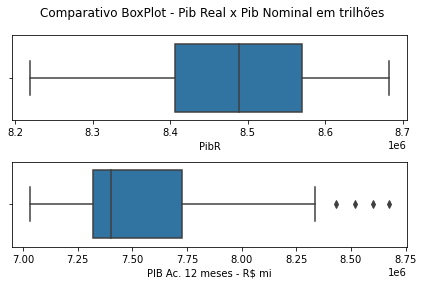

In [29]:
#Box-Plot do PIB real x PIB Nominal
fig, ax = plt.subplots(2)

fig.suptitle('Comparativo BoxPlot - Pib Real x Pib Nominal em trilhões')

sns.boxplot(data = df, x=pibr, ax=ax[0])
sns.boxplot(data = df, x=pib, ax=ax[1])

plt.tight_layout()

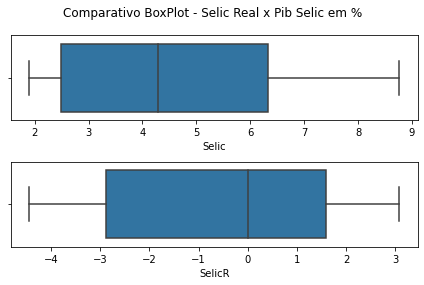

In [30]:
#Box-Plot do PIB real x PIB Nominal
fig, ax = plt.subplots(2)

fig.suptitle('Comparativo BoxPlot - Selic Real x Pib Selic em %')

sns.boxplot(data = df, x=selic, ax=ax[0])
sns.boxplot(data = df, x=selicr, ax=ax[1])

plt.tight_layout()

Text(0.5, 1.0, 'Comparativo PIB Real x Tendencia, 2003 a 2021')

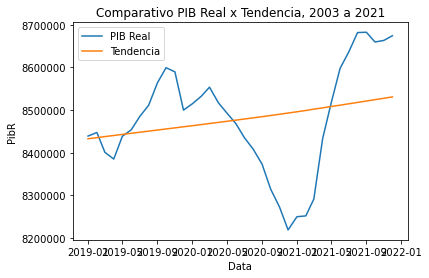

In [31]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle,trend = hpfilter(pibr[0:],129600)

pib_hp = df[["PibR"[0:]]].copy()
pib_hp["cycle"] = cycle
pib_hp["tendencia"] = trend

fig, ax = plt.subplots(1,1)

plt.ticklabel_format(style='plain')
sns.lineplot(data=pib_hp, x="Data", y="PibR", dashes=False, label = "PIB Real")
sns.lineplot(data=pib_hp, x="Data", y="tendencia", label = "Tendencia")

ax.set_title("Comparativo PIB Real x Tendencia, 2003 a 2021")

<AxesSubplot:title={'center':'Hiato do produto, filtro HP. 2003 à 2021'}, xlabel='Data', ylabel='hiato'>

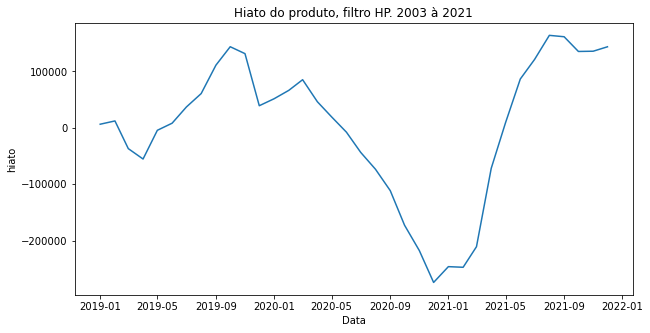

In [32]:
pib_hp["hiato"] = pibr - trend
hiato = pib_hp["hiato"]

plt.rcParams.update({'figure.figsize': (10,5)})
fig,ax = plt.subplots(1,1)
ax.set_title("Hiato do produto, filtro HP. 2003 à 2021")
sns.lineplot(data=pib_hp, x="Data", y="hiato",dashes=False)

In [33]:
# df para regressão IS real
hiato_is = hiato
selicr_is = selicr
necac_is = necac
hiato_is_1 = hiato.shift(1)
hiato_is_2 = hiato.shift(2)
selicr_is_1 = selicr.shift(1)
necac_is_1 = necac.shift(1)

d = {"hiato": hiato_is,
     "juros": selicr_is,
     "hiato_1" : hiato_is_1,
     "hiato_2" : hiato_is_2,
     "juros_1": selicr_is_1,
     "necessidade" : necac_is,
     "necessidade_1" : necac_is_1}

df_is = pd.DataFrame(data = d)
df_is

,hiato,juros,hiato_1,hiato_2,juros_1,necessidade,necessidade_1
Data,,,,,,,
2019-01-01,6313.297437,2.5280,NaN,NaN,NaN,108300.96,NaN
2019-02-01,12121.907211,2.4157,6313.297437,NaN,2.5280,105818.21,108300.96
2019-03-01,-36944.531729,1.7448,12121.907211,6313.297437,2.4157,99312.17,105818.21
2019-04-01,-55363.561630,1.3907,-36944.531729,12121.907211,1.7448,95575.00,99312.17
2019-05-01,-4470.839673,1.6641,-55363.561630,-36944.531729,1.3907,100358.94,95575.00
2019-06-01,8112.604149,2.9348,-4470.839673,-55363.561630,1.6641,99573.96,100358.94
2019-07-01,36865.874341,3.0786,8112.604149,-4470.839673,2.9348,98936.29,99573.96
2019-08-01,60605.512808,2.3893,36865.874341,8112.604149,3.0786,95508.39,98936.29
2019-09-01,110995.677000,2.7372,60605.512808,36865.874341,2.3893,91427.90,95508.39


In [34]:
e = {"hiato": np.log(hiato_is + 370000),
     "juros": np.log(selicr_is + 6.4448),
     "necessidade": np.log(necac_is + 160000),
     "hiato_1" : np.log(hiato_is.shift(1) + 370000),
     "hiato_2" : np.log(hiato_is.shift(2) + 370000),
     "juros_1": np.log(serie.shift(1) + 6.4448),
     "necessidade_1": np.log(necac_is.shift(1) + 160000)}

df_is_n = pd.DataFrame(data = e)
df_is_n

,hiato,juros,necessidade,hiato_1,hiato_2,juros_1,necessidade_1
Data,,,,,,,
2019-01-01,12.838177,2.194198,12.499865,NaN,NaN,NaN,NaN
2019-02-01,12.853495,2.181603,12.490568,12.838177,NaN,2.668672,12.499865
2019-03-01,12.716064,2.102865,12.465788,12.853495,12.838177,2.660854,12.490568
2019-04-01,12.659173,2.058665,12.451271,12.716064,12.853495,2.612831,12.465788
2019-05-01,12.809101,2.092962,12.469816,12.659173,12.716064,2.586523,12.451271
2019-06-01,12.842947,2.238537,12.466797,12.809101,12.659173,2.606896,12.469816
2019-07-01,12.916239,2.253752,12.464337,12.842947,12.809101,2.696490,12.466797
2019-08-01,12.972948,2.178619,12.451011,12.916239,12.842947,2.706142,12.464337
2019-09-01,13.083614,2.217245,12.434912,12.972948,12.916239,2.659007,12.451011


In [35]:
import statsmodels.formula.api as smf

res_1 = smf.ols(formula= "hiato ~ hiato_1 + hiato_2 + juros_1 + necessidade_1", data=df_is).fit()
print(res_1.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.928     
Dependent Variable:   hiato              AIC:                  812.0355  
Date:                 2022-05-17 06:56   BIC:                  819.6674  
No. Observations:     34                 Log-Likelihood:       -401.02   
Df Model:             4                  F-statistic:          107.6     
Df Residuals:         29                 Prob (F-statistic):   5.85e-17  
R-squared:            0.937              Scale:                1.2059e+09
-------------------------------------------------------------------------
                Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------
Intercept     37942.5672 15347.1050  2.4723 0.0195   6554.2132 69330.9212
hiato_1           1.2918     0.1532  8.4309 0.0000      0.9784     1.6052
hiato_2          -0.6274     0.1380 -4.5454 0.0001     -0.9